In [1]:
import torch.backends.cudnn as cudnn
import torch
import torchvision.transforms as transforms
from nltk.translate.bleu_score import corpus_bleu
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image
from urllib.request import urlopen
%matplotlib inline
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
from Evaluation import *
from Model import *
from Dataset import *
from Inference import GenerateCaption,Visualize_Attention
%load_ext autoreload
%autoreload 2

In [3]:
#filename
word_map_path = '../dataset/WORDMAP_coco_5_cap_per_img_5_min_word_freq.json'
data_folder ='../dataset/'
data_name = 'coco_5_cap_per_img_5_min_word_freq'
trained_model_path="trained_model/BEST_checkpoint_coco_5_cap_per_img_5_min_word_freq.pth.tar"

In [4]:
# Load word map (word2ix)
with open(word_map_path, 'r') as j:
    word_map = json.load(j)

In [5]:
#load pretrained_model
model_data=torch.load(trained_model_path)
model_data.keys()

dict_keys(['epoch', 'epochs_since_improvement', 'bleu-4', 'encoder', 'decoder', 'encoder_optimizer', 'decoder_optimizer'])

In [6]:
#load pretrained weights
encoder=model_data['encoder']
decoder=model_data['decoder']
generatecap= GenerateCaption(encoder,decoder,50,word_map)

In [7]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
#create test dataset
test_dataset=COCODataset(data_folder, data_name, 'TEST')

In [8]:
generatecap= GenerateCaption(encoder,decoder,50,word_map)

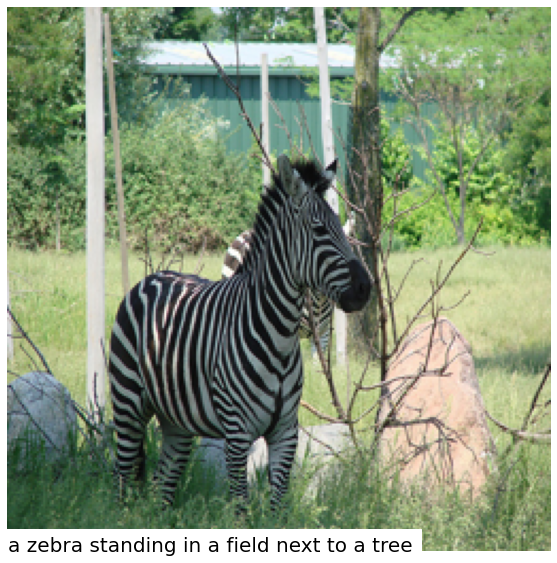

In [16]:
#play with random test data

#Generate random image index
index=np.random.randint(len(test_dataset))
#get only image from dataset
image,_,_,_=test_dataset[index]

#get caption from model
_,caption,_,_=generatecap.Eval(image=image.unsqueeze(0).to(device))

figsize=(10,10)
###########<Visualization logic>#######################
img=image.permute(1,2,0).numpy()
plt.figure(figsize=figsize)
plt.imshow(img)
plt.text(0,img.shape[0], '{0}'.format(' '.join(caption[:-1])), color='black', backgroundcolor='white', fontsize=figsize[0]*2)
plt.axis('off')
#plt.savefig('../Test_Image/caption/'+str(index)+'.jpeg')
plt.show()
###########<\Visualization logic>#######################

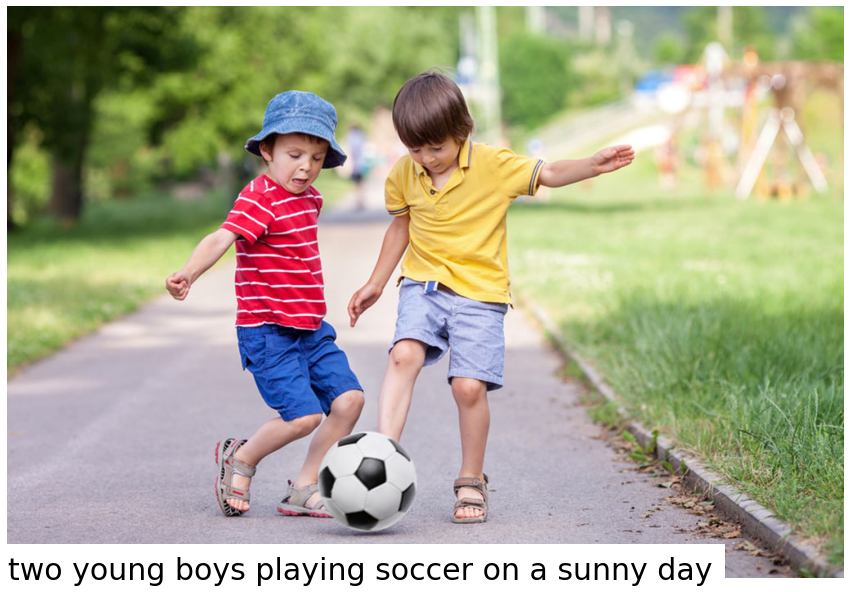

In [17]:
#lets play with some random image from google
image_url= 'https://cdn.cdnparenting.com/articles/2018/03/287152637-H.jpg'

_,caption,_,_s=generatecap.Eval(image_url=image_url)


image = Image.open(urlopen(image_url)).convert('RGB')

figsize=(15,15)
###########<Visualization logic>#######################
plt.figure(figsize=figsize)
plt.imshow(image)
image=np.asarray(image)
plt.text(0,image.shape[0], '{0}'.format(' '.join(caption[:-1])), color='black', backgroundcolor='white', fontsize=figsize[0]*2)
plt.axis('off')
#plt.savefig('../Test_Image/image_with_caption/'+str(index)+'.jpeg')
plt.show()
###########<\Visualization logic>#######################

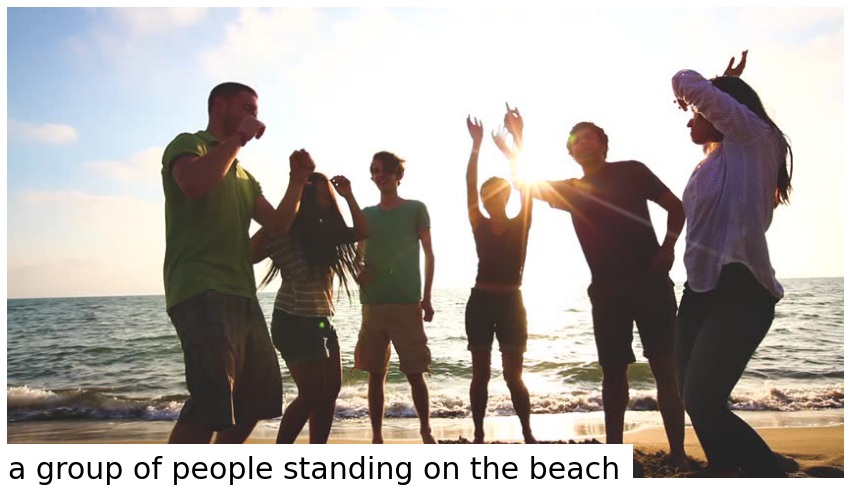

In [12]:
image_url= 'https://ak7.picdn.net/shutterstock/videos/22720387/thumb/1.jpg'

_,caption,_,_s=generatecap.Eval(image_url=image_url)


image = Image.open(urlopen(image_url)).convert('RGB')

figsize=(15,15)
###########<Visualization logic>#######################
plt.figure(figsize=figsize)
plt.imshow(image)
image=np.asarray(image)
plt.text(0,image.shape[0], '{0}'.format(' '.join(caption[:-1])), color='black', backgroundcolor='white', fontsize=figsize[0]*2)
plt.axis('off')
#plt.savefig('../Test_Image/image_with_caption/'+str(index)+'.jpeg')
plt.show()
###########<\Visualization logic>#######################